In [5]:

import sys
import os

# Add the project root to PYTHONPATH
project_root = os.path.abspath("../../")  # adjust as needed
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(project_root)

import exp_driver.experiment as E

/data/marci/mjakowsk/EDS4AI/DeficitProject


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

params = { "deficit_params": {"subset_size":0.1, "start_epoch" : 0}}
dirs = ["similarity_AVG", "similarity", "disimilarity_AVG", "disimilarity", "random_subset_AVG", "random_subset"]

subset_size_list = [0.1, 0.2, 0.3]
exps = []

for subset_size in subset_size_list:
    params["deficit_params"]["subset_size"] = subset_size
    exps = exps + E.match_experiments(dirs, params=params)


deficit_type = []
final_test_acc = []
deficit_onset = []
deficit_duration = []
training_duration = []
id = []
accuracy_diff = []
convergence_epochs = []
total_durations = []
subset_sizes = []

baseline_accuracy = 93.40

print(exps)

for exp_id, dir in exps:
    config = E.get_config(exp_id=exp_id, dir=dir)
    deficit_params = config["deficit_params"]


    subset_size = config["deficit_params"]["subset_size"]

    if deficit_params["start_epoch"] > 320:
        continue
    #if deficit_params["start_epoch"] > 40:
        #continue

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        if config["deficit_params"]["type"] == "similarity":
            continue

    onset = deficit_params["start_epoch"]
    end = deficit_params["end_epoch"]

    _, _, _, test_accs = E.get_data(exp_id=exp_id, dir= dir)

    final_acc = test_accs[-1]
    acc_diff = baseline_accuracy - final_acc

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        if config["deficit_params"]["type"] == "disimilarity":
            deficit_type.append("dissimilarity")
        else :
            deficit_type.append(deficit_params["type"])
    else :
        deficit_type.append("random")

    num_post_epochs = config["num_epochs"] - end
    
    final_test_acc.append(final_acc)
    deficit_onset.append(onset)
    deficit_duration.append(end-onset)
    training_duration.append(config["num_epochs"])
    accuracy_diff.append(acc_diff)
    id.append(exp_id)
    convergence_epochs.append(num_post_epochs)
    total_durations.append(config["num_epochs"])
    
    subset_sizes.append(subset_size)



df = pd.DataFrame({
    "Type" : deficit_type,
    "Accuracy" : final_test_acc,
    "Window Onset (epoch)" : deficit_onset,
    "Deficit Removal Epoch" : deficit_duration,
    "Training Duration" : training_duration,
    "ID" : id,
    "Test Accuracy Decrease" : accuracy_diff,
    'Post Epochs' : convergence_epochs,
    "Total Duration" : total_durations,
    "Subset Size" : subset_sizes
                  })
    

[('5oU5AHPr', 'similarity_AVG'), ('70zrsvcS', 'similarity_AVG'), ('p04NLQ29', 'similarity_AVG'), ('qE0mimgy', 'similarity_AVG'), ('mOGtpwDl', 'similarity_AVG'), ('9A50iWru', 'similarity_AVG'), ('Wiad3IdT', 'similarity_AVG'), ('GOQPRUcF', 'similarity_AVG'), ('LSZbXXXi', 'similarity_AVG'), ('7jzLOdH7', 'similarity_AVG'), ('g2HcfiDV', 'similarity_AVG'), ('wW4ZYuFb', 'similarity_AVG'), ('2fXTypLV', 'similarity_AVG'), ('y6V63rL8', 'similarity_AVG'), ('eLp9nxYA', 'similarity_AVG'), ('Dw9dTXZw', 'similarity_AVG'), ('kQhjsJKc', 'similarity_AVG'), ('3WjTxvKO', 'similarity_AVG'), ('DaC8XnZ2', 'similarity_AVG'), ('jOMFHkvC', 'similarity_AVG'), ('rF69QnHM', 'similarity_AVG'), ('MSgJDqua', 'similarity_AVG'), ('D5ztSFfY', 'similarity_AVG'), ('sL2daABA', 'similarity_AVG'), ('e8LXMS80', 'similarity_AVG'), ('IyPMeQD5', 'similarity_AVG'), ('BJuzAmj2', 'similarity_AVG'), ('ifNAA7pU', 'similarity_AVG'), ('HF0XBWsn', 'similarity_AVG'), ('ERzhsA46', 'similarity_AVG'), ('bUTQ6inl', 'similarity_AVG'), ('igrSu

Text(0.5, 1.0, 'Deficit Removal Effect By Size')

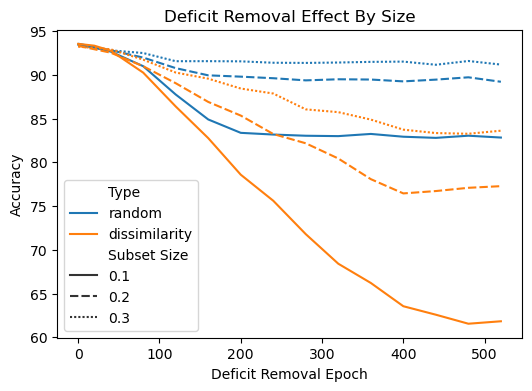

In [8]:
#s = sns.lineplot(data=df, x="Deficit Removal Epoch", y= "Accuracy", hue="Subset Size", style="Type", palette="viridis", errorbar=None)
plt.figure(figsize=(6, 4))          # width, height in inches
s = sns.lineplot(data=df, x="Deficit Removal Epoch", y= "Accuracy", 
                 hue="Type", hue_order=["random", "dissimilarity"],
                #height=4, aspect=1.5,
                 style="Subset Size", palette="tab10", errorbar=None)
s.set_title("Deficit Removal Effect By Size")